In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from utils.imports import *
PATH = Path('data/17')
PATH.mkdir(exist_ok=True)
path_x_512 = PATH/'preprocessed'/'2017B'
path_y_512 = PATH/'preprocessed'/'b-class'
path_stats = PATH/'preprocessed'/'2017B'/'stats.npy'

sz = 512
test_size = 0.2
gpu_start = 8
world_size = 2
bs = world_size * 19
num_workers = 4

In [3]:
# load_name = 'data/landcover/models/long_run.h5'
# load_name = 'data/17/models/4_long_run_cyc_0.h5'
# pop_last_n = 2
load_name = 'None'
pop_last_n = 0
%run train_17 {str(path_x_512)} {str(path_y_512)} {str(PATH)} {str(path_stats)}\
    {bs} {sz} {gpu_start} --world_size={world_size} --load_name={load_name} --pop_last_n={pop_last_n}

In [ ]:
learner.lr_find()
learner.sched.plot()

  0%|          | 0/64 [00:00<?, ?it/s]

## Train

# restart training from scratch

epoch      trn_loss   val_loss   
    0      1.821298   1.744398  
    1      1.561755   1.338284  
    2      1.296083   1.107762  
    3      1.140589   1.070842  
    4      1.02464    0.939851  
    5      0.955204   0.869532  
    6      0.903105   0.825239  
    7      0.85131    0.817462  
    8      0.826677   0.834309  
    9      0.799408   0.748256  
    10     0.773807   0.866802  
    11     0.762147   0.735301  
    12     0.752641   0.731689  
    13     0.726988   0.78432   
    14     0.721958   0.69585   
    15     0.708209   0.739615  
    16     0.701098   0.776162  
    17     0.686084   0.681283  
    18     0.671948   0.707286  
    19     0.677753   0.754979  
    20     0.681171   0.728039  
    21     0.659462   0.708848  
    22     0.658759   0.681175  
    23     0.650379   0.685058  
    24     0.640456   0.743297  
    25     0.65449    0.680847  
    26     0.650816   0.669062  
    27     0.641775   0.674176  
    28     0.628135   0.692953  
    29   

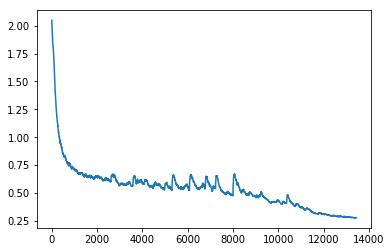

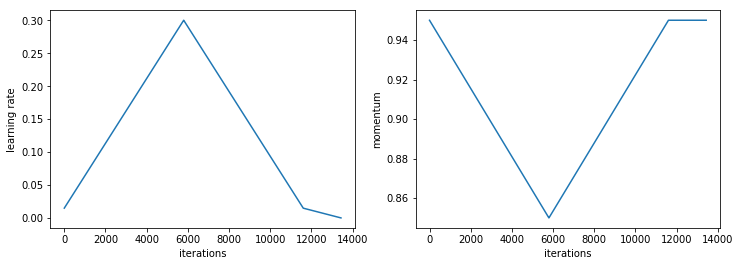

In [4]:
lr = 3*1e-1
sargs = save_args('scratch', PATH)
learner.fit(lr, 1, cycle_len=70*3, use_clr_beta=(20, 13.68, 0.95, 0.85), wds=1e-4, **sargs)
save_sched(learner.sched, PATH)